In [298]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
import sys 

sys.path.append("/Users/miroine/projects/pvt_project/pvt")

In [202]:
from pypvt.pvt_correlations.oil_correlation import Oil

In [205]:
# bubble point pressure 
c= Oil()

help(c.oil_pbubble)

Help on method oil_pbubble in module pypvt.pvt_correlations.oil_correlation:

oil_pbubble(rs, sto_api, sg_gas, temp, correlaion='standing', unit_system='metric') method of pypvt.pvt_correlations.oil_correlation.Oil instance
        calculate oil bubble pressure based on several correlations 
        Most of the correlation are part of the SPE monograph manual            
    
    Parameters
    ----------
        rs : float
            single-stage gas-oil solution ratio (metric: sm3/sm3, field: scf/stb)
        sto_api : float
            stock tank oil API gravity
        sg_gas : float
            specific gravity of surface gas
        temp : float
            reservoir temperature (metric: Celcius, field Farenheit)
        correlation : str 
            standing : based on Standing bubble-point correlation 
                        Application range : lighter volatile oils, low res. temperatures               
            vazquezbeggs : based on Vazquez and Beggs correlation 
     

In [241]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]

data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep
oil_sample,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60
2,220,2630,768,1.474,40.95,40.7,0.855,100,75
3,260,2051,693,1.529,37.37,48.6,0.911,100,72
4,237,2884,968,1.619,38.92,40.5,0.898,60,120
5,218,3065,943,1.570,37.70,44.2,0.781,200,60
6,180,4239,807,1.385,46.79,27.3,0.848,85,173


In [229]:
# calculate an sg_gas at sep condition 
results=[]
for index, row in data.iterrows():
    x = c.sg_gas_sep(sg_gas = row['sg_gas'] , sto_api = row['sto_api'], t_sep = row['t_sep'], p_sep = row['p_sep'], unit_system='field')
    results.append(x)

data ['sg_gas_sep'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185


In [230]:
results=[]
for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['pb_standing'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779


In [235]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['pb_vasquezbeggs'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso
oil_sample,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456


In [232]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas_sep'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['pb_vasquezbeggs_new'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437


In [236]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='glaso', unit_system='field')
    results.append(x)
data['pb_glaso'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso
oil_sample,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456


In [237]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='marhoun', unit_system='field')
    results.append(x)
data['pb_marhoun'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso,pb_marhoun
oil_sample,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864,2406.962552
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207,2567.642703
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256,1984.211159
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220,2865.580807
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684,3295.661048
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456,3215.741060


In [238]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['pb_petrosky'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso,pb_marhoun,pb_petrosky
oil_sample,,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864,2406.962552,2330.906165
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207,2567.642703,2767.646436
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256,1984.211159,1892.580253
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220,2865.580807,3284.643952
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684,3295.661048,3287.726726
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456,3215.741060,3908.083270


## Formation volume factor 



In [242]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]

data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep}).set_index('oil_sample')

data


,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep
oil_sample,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60
2,220,2630,768,1.474,40.95,40.7,0.855,100,75
3,260,2051,693,1.529,37.37,48.6,0.911,100,72
4,237,2884,968,1.619,38.92,40.5,0.898,60,120
5,218,3065,943,1.570,37.70,44.2,0.781,200,60
6,180,4239,807,1.385,46.79,27.3,0.848,85,173


In [243]:
help(c.oil_bob)

Help on method oil_bob in module pypvt.pvt_correlations.oil_correlation:

oil_bob(temp, rs, sto_api, sg_gas, unit_system='metric', correlation='standing') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    oil formation volume factor at bubble-point pressure
    
    Application range : xxxx
    
    Input:
        temp    : reservoir temperature (metric: Celcius, field Farenheit)
        rs      : single-stage gas-oil solution ratio (metric: sm3/sm3, field: scf/stb )
        sg_gas  : surface gas specific gravity (dens/dens_air)
        sto_api  : oil api
        unit_system : "metric" or "field"
        correlation: correlation to be used for know only those correlations are implemented
                     - standing : Standing correlation
                     - vazquezbeggs : Vazquez and Beggs correlation
                     - glaso : Glaso's correlation
                     - marhoun : Marhoun correlatio
                     - petrosky : Petrosky and Farshad
    
 

In [244]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['bo_standing'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915


In [249]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['bo_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619


In [252]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='glaso', unit_system='field')
    results.append(x)
data['bo_glaso'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs,bo_glaso
oil_sample,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950,1.473207
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257,1.459002
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882,1.461077
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198,1.601538
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015,1.541065
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619,1.437876


In [253]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='marhoun', unit_system='field')
    results.append(x)
data['bo_marhoun'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs,bo_glaso,bo_marhoun
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950,1.473207,1.516257
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257,1.459002,1.477718
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882,1.461077,1.511339
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198,1.601538,1.595022
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015,1.541065,1.554896
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619,1.437876,1.413923


In [254]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['bo_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs,bo_glaso,bo_marhoun,bo_petrosky
oil_sample,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950,1.473207,1.516257,1.552778
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257,1.459002,1.477718,1.508359
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882,1.461077,1.511339,1.556245
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198,1.601538,1.595022,1.657961
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015,1.541065,1.554896,1.584403
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619,1.437876,1.413923,1.433320


## Oil compressibility

In [258]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [259]:
help(c.oil_compressibility)

Help on method oil_compressibility in module pypvt.pvt_correlations.oil_correlation:

oil_compressibility(temp: float, sto_api: float, press: float, sg_gas: float, rs: float = 0, correlation='vasquezbeggs', unit_system='metric') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    return isothermal compressibility of the oil
    
    Args:
        temp (float): temperature
        sto_api (float): oil API
        press (float): pressure
        rs  (float) : gas solubility at pb
        sg_gas (float): gas gravity
        correlation (str, optional): _description_. Defaults to "vasquezbeggs".
        unit_system (str, optional): _description_. Defaults to "metric".



In [260]:
results=[]
for index, row in data.iterrows():
    x = c.oil_compressibility(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'],press= row['press'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['c_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,c_vasquezbeggs
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,0.000032
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,0.000029
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,0.000034
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,0.000032
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,0.000028
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,0.000017


In [261]:
results=[]
for index, row in data.iterrows():
    x = c.oil_compressibility(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'],press= row['press'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['c_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,c_vasquezbeggs,c_petrosky
oil_sample,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,0.000032,0.000022
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,0.000029,0.000019
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,0.000034,0.000023
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,0.000032,0.000023
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,0.000028,0.000020
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,0.000017,0.000012


In [278]:
sto_api = 47.1 
pb = 2377 
sg_gas = 0.851
sg_gas_sep = 0.873 
rsb = 751 
temp = 250 
press = 1650
bob =   1.528 

c.oil_compressibility(rs = rsb, temp=temp, sg_gas= sg_gas, sto_api=sto_api,press= press, correlation ='petrosky', unit_system='field')

2.9765552739221825e-05

## Gas Solubility

In [263]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [264]:
help(c.rsbub)

Help on method rsbub in module pypvt.pvt_correlations.oil_correlation:

rsbub(sto_api, temp, press, sg_gas, correlation='standing', unit_system='metric') -> float method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Rs correlations 
    
    Args:
        sto_api (float): oil API
        temp (float): Temperature 
        pb (float): bubble point pressure
        sg_g (_type_): gas gravity
        correlation (str, optional): correlation for the calculation. Defaults to "standing".
        unit_system (str, optional): unit system can be field or metric. Defaults to "metric".
    
    Returns:
        float: Rs for the oil



In [266]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['rs_standing'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513


In [269]:
# calculate an sg_gas at sep condition 
results=[]
for index, row in data.iterrows():
    x = c.sg_gas_sep(sg_gas = row['sg_gas'] , sto_api = row['sto_api'], t_sep = row['t_sep'], p_sep = row['p_sep'], unit_system='field')
    results.append(x)

data ['sg_gas_sep'] = results

In [271]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas_sep'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['rs_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,rs_vasquezbeggs,sg_gas_sep
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,768.294861,0.867568
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,723.165582,0.845810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,687.687789,0.899775
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,755.087793,0.825391
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,944.379556,0.810568
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,821.700547,0.817185


In [275]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='glaso', unit_system='field')
    results.append(x)
data['rs_glaso'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,rs_vasquezbeggs,sg_gas_sep,rs_glaso
oil_sample,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,768.294861,0.867568,731.755130
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,723.165582,0.845810,713.209671
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,687.687789,0.899775,681.160418
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,755.087793,0.825391,819.727273
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,944.379556,0.810568,869.785965
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,821.700547,0.817185,837.954643


In [276]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='marhoun', unit_system='field')
    results.append(x)
data['rs_marhoun'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,rs_vasquezbeggs,sg_gas_sep,rs_glaso,rs_marhoun
oil_sample,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,768.294861,0.867568,731.755130,737.319236
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,723.165582,0.845810,713.209671,793.489899
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,687.687789,0.899775,681.160418,725.217489
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,755.087793,0.825391,819.727273,975.849708
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,944.379556,0.810568,869.785965,851.235184
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,821.700547,0.817185,837.954643,1186.435134


In [277]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['rs_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,rs_vasquezbeggs,sg_gas_sep,rs_glaso,rs_marhoun,rs_petrosky
oil_sample,,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,768.294861,0.867568,731.755130,737.319236,767.184129
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,723.165582,0.845810,713.209671,793.489899,724.515907
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,687.687789,0.899775,681.160418,725.217489,751.924104
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,755.087793,0.825391,819.727273,975.849708,828.897296
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,944.379556,0.810568,869.785965,851.235184,866.622121
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,821.700547,0.817185,837.954643,1186.435134,896.264214


## Oil formation volume factor for undersatured oil 

In [279]:
help(c.oil_bo)

Help on method oil_bo in module pypvt.pvt_correlations.oil_correlation:

oil_bo(press: float, temp: float, sg_gas: float, pb: float = 0, rs: float = 0, sg_oil: float = 0, bob: float = 0, unit_system: str = 'metric', correlation: str = 'vazquezbeggs') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    generated undersatured oil fvf factor 
    
    Args:
        press (float): pressure
        temp (float): temperature
        pb (float, optional): bubble point pressure will be calculated if defaulted to zero. Defaults to 0.
        bob (float, optional): oil fvf for at bubble point pressure, will be calcualted if defaulted. Defaults to 0.
        unit_system (str, optional): unit system could be field or metric. Defaults to "metric".
        correlation (str, optional): different correlations . Defaults to "vazquezbeggs".



In [290]:
sto_api = 47.1 
pb = 2377 
sg_gas = 0.851
sg_gas_sep = 0.873 
rsb = 751 
bob =   1.528 
press = 5000 
temp = 250

c.oil_bo(press= press, rs=rsb,temp=temp, pb=pb ,sg_gas=sg_gas, sto_api=sto_api, bob=bob, unit_system="field" )

1.4590261455524043

## oil density

In [293]:
help(c.oil_den)

Help on method oil_den in module pypvt.pvt_correlations.oil_correlation:

oil_den(press: float, temp: float, rs: float = 0, sg_gas: float = 0, sg_sp: float = 0, pb: float = 0, sg_oil: float = 0, sto_api: float = 0, bob: float = 0, correlation: str = 'standing', unit_system: str = 'metric') -> float method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Returns live oil density calculated with different correlations
    
    p: Pressure
    pb: Bubble point pressure . Defaults to 0, and not used for densities below Pb. A valid value is required for density calculations above Pb
    temp: Reservoir Temperature 
    rs: Oil solution gas volume (scf/stb)
    sg_gas: Weighted average specific gravity of surface gas (relative to air).
    sg_sp: Separator gas specific gravity (relative to air). If not known, an alternate nethod to estimate pseudo liquid density of surface gas will be used
    sto_api: Stock tank oil density (deg API). If undefined will calculate from sg_o. If both

In [307]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [308]:
results=[]
for index, row in data.iterrows():
    x = c.oil_den( temp=row['temp'], press = row['press'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['density_standing'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,density_standing
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,36.730185
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,39.227636
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,36.108239
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,38.585764
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,36.936610
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,42.125701


In [323]:
results=[]
for index, row in data.iterrows():
    x = c.oil_den( temp=row['temp'], press = row['press'],sg_gas= row['sg_gas'], pb = row['pb'],sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['density_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,density_standing,density_vasquezbeggs,density_petrosky
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,36.730185,37.678048,2.996739
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,39.227636,40.107605,1.638061
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,36.108239,37.237028,4.716490
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,38.585764,39.320065,0.555905
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,36.936610,37.912641,1.948538
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,42.125701,43.473129,0.983090


In [326]:
results=[]
for index, row in data.iterrows():
    x = c.oil_den( temp=row['temp'], press = row['press'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], pb = row['pb'],correlation ='petrosky', unit_system='field')
    results.append(x)
data['density_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,density_standing,density_vasquezbeggs,density_petrosky
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,36.730185,37.678048,37.602617
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,39.227636,40.107605,40.173533
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,36.108239,37.237028,36.856880
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,38.585764,39.320065,39.262529
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,36.936610,37.912641,38.250095
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,42.125701,43.473129,43.026800


## calculate Bt 

In [327]:
pb = 2744 
temp = 600 - 460 
sg_gas = 0.6744
rs = 444 
rsb = 603 
sto_api = c.calc_api(0.843)
press = 2000
bo = 1.1752 


In [328]:
help(c.calculate_bt)

Help on method calculate_bt in module pypvt.pvt_correlations.oil_correlation:

calculate_bt(temp: float, press: float, sto_api: float, sg_gas: float, rs: float = 0, unit_system: str = 'metric', correlation='standing') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    total volume factor calculation 
    
    Args:
        temp (float): temperature
        press (float): pressure
        sto_api (float): oil API
        sg_gas (float): gas gravity
        rs (float, optional): soluation gas if null than it will be calculation. Defaults to 0.



In [334]:
c.calculate_bt(temp = temp, press= press, sto_api=sto_api , sg_gas= sg_gas, rs=rs ,correlation="standing", unit_system="field")

1.2014672507976176

In [335]:
c.calculate_bt(temp = temp, press= press, sto_api=sto_api , sg_gas= sg_gas, rs=rs ,correlation="glaso", unit_system="field")

1.1375323500982994

In [339]:
c.calculate_bt(temp = temp, press= press, sto_api=sto_api , sg_gas= sg_gas, rs=rs ,correlation="marhoun", unit_system="field")

1.2668755695013618

## Oil Viscosity

In [340]:
help(c.oil_viscosity)

Help on method oil_viscosity in module pypvt.pvt_correlations.oil_correlation:

oil_viscosity(sto_api: float, temp: float, oiltype: str = 'dead', pb: float = 0, press: float = 0, rs: float = 0, correlation='beggs', unit_system: str = 'metric') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Oil viscosity in cp
    
    Args:
        sto_api (float): Oil api
        temp (float): Temperature
        oiltype (str, optional): Oil type can be dead, saturated, undersatured. Defaults to "dead".
        correlation (str, optional): used correlation. Defaults to "beggs".
        rs (float, optional): used for saturated correlations
        unit_system (str, optional): units can be field or metric



In [342]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [364]:
results=[]
for index, row in data.iterrows():
    x = c.oil_viscosity( temp=row['temp'], sto_api=row['sto_api'],rs = row['rs'], press = row['press'], pb = row['pb'],unit_system='field', correlation="vasquezbeggs", oiltype="undersaturated")
    results.append(x)
data['viscosity_deadoil'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,viscosity_deadoil
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,0.255402
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,0.341392
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,0.249839
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,0.285140
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,0.280998
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,0.713234


## Oil Case

In [365]:
data= pd.read_csv("tableid.csv")
data.columns = ['press' , 'temp' , 'Rs' , 'density', 'bo' , 'viscosity' , 'compressibility', 'tension']

In [366]:
data

,press,temp,Rs,density,bo,viscosity,compressibility,tension
0,1.0,20,0.028,826.5,1.004,19.10,0.0000,26.6
1,1.0,60,0.013,795.0,1.044,2.64,0.0067,25.3
2,2.0,60,2.030,793.1,1.049,2.46,0.0049,24.6
3,3.0,60,4.060,791.1,1.053,2.29,0.0032,23.9
4,4.0,60,5.700,789.6,1.057,2.16,0.0022,23.4
...,...,...,...,...,...,...,...,...
497,496.0,60,200.000,701.7,1.409,0.61,0.0001,1.0
498,497.0,60,200.000,701.8,1.409,0.61,0.0001,1.0
499,498.0,60,200.000,701.9,1.409,0.61,0.0001,1.0
500,499.0,60,200.000,701.9,1.409,0.61,0.0001,1.0


<Axes: xlabel='press', ylabel='Rs'>

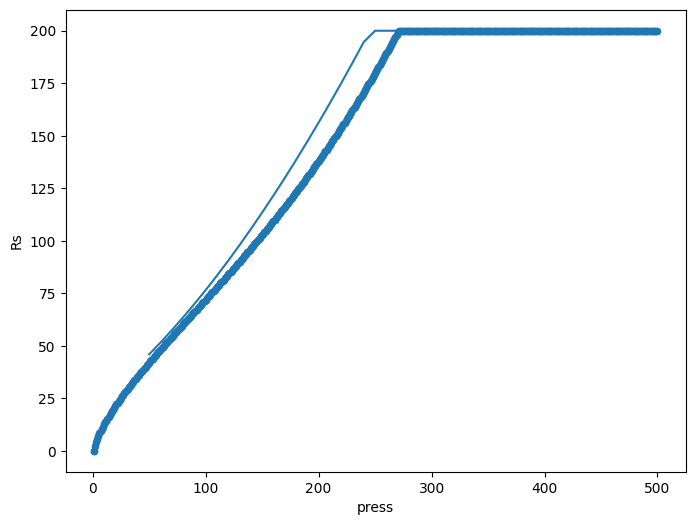

In [369]:
import matplotlib.pyplot as plt 
temp = 60 
pb = 270 # bar
sto_api = 38.828 
sg_gas = 0.85
rsb = 200

rs= []
p = []
c= Oil()
for press in range(50, 500,10):
    p.append(press)
    rs.append(c.calculate_rs(temp=temp, press=press, rsb=rsb, sg_gas=sg_gas, sto_api=sto_api, correlation="petrosky" ))


fig, ax = plt.subplots (figsize=(8,6))
ax.plot(p,rs)

data.plot(x="press", y="Rs", kind="scatter" , ax=ax)





49.965403971841766
59.95848498484462
69.95156603131367
79.94464710643231
89.93772820659915
99.93080932901871
109.92389047145791
119.91697163209146
129.91005280939942
139.90313400209664
149.8962152090818
159.8892964294009
169.88237766221962
179.87545890680158
189.86854016249274
199.8616214287078
209.85470270492004
219.84778399065323
229.84086528547405
239.83394658898735
249.82702790083053
259.82010922067036
269.8131905481991
279.8062718831317
289.79935322520396
299.79243457416914
309.7855159297977
319.7785972918745
329.77167866019795
339.76476003457896
349.7578414148389
359.7509228008099
369.7440041923334
379.7370855892593
389.73016699144523
399.7232483987564
409.71632981106467
419.7094112282481
429.70249265019055
439.6955740767813
449.68865550791486
459.6817369434903
469.67481838341064
479.66789982758365
489.66098127592096


<Axes: xlabel='press', ylabel='density'>

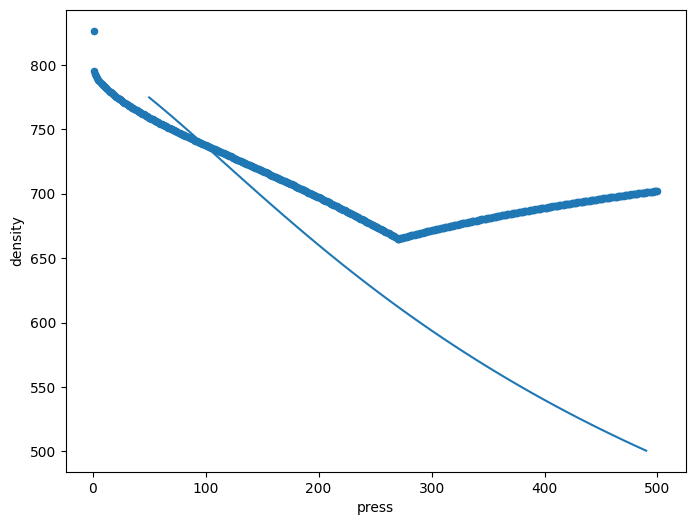

In [377]:
bo= []
p = []
c= Oil()
for press in range(50, 500,10):
    p.append(press)
    #rs.append(c.calculate_rs(temp=temp, press=press, pb=pb, sg_gas=sg_gas, sto_api=sto_api, correlation="petrosky" ))
    bo.append(c.oil_den (press=press,rs=200, temp=temp,  sg_gas = sg_gas, sto_api=38.3, correlation="vasquezbeggs"))

fig, ax = plt.subplots (figsize=(8,6))
ax.plot(p,bo)

data.plot(x="press", y="density", kind="scatter" , ax=ax)

In [187]:
c.oil_den (press=press, temp=temp,  sg_gas = sg_gas,
        pb=pb, sg_oil=0.83)

above bubble point
density generated in Kg/m3


/Users/miroine/projects/pvt_project/pvt/pypvt/pvt_correlations/oil_correlation.py:585: UserWarning: No Bo inputs --> calculating it using standing
  warnings.warn("No Bo inputs --> calculating it using standing")
/Users/miroine/projects/pvt_project/pvt/pypvt/pvt_correlations/oil_correlation.py:588: UserWarning: No RS inputs --> calculating it using standing
  warnings.warn("No RS inputs --> calculating it using standing")


787.4391183279915

In [143]:
0.83

0.83

In [160]:
c= Oil()
c.oil_bo(temp=temp, sg_gas=sg_gas, pb=pb,press=press, sg_oil=0.83, correlation="standing")

266.24762597612005
1.8711781455539125
0.0017884376732413144
0.9854903731707008


1.844028048930785

## Dry gas correlation

library for main dry gas correlations

In [243]:

"""
INPUT
"""
pressure = 300 # bar
temp = 120 # degC
sg = 0.85 # specific gravity
x_h2s = 0.02 # mole fraction of H2S in gas
x_co2 = 0.1 # mole fraction of CO2 in gas

"""
CALCULATOR
"""
# initialize a dry gas object 
c = DryGas ()


zfactor = c.gas_zfactor (temp_i = temp , press_i = pressure, sg = sg, unit_system="metric")

gas_density = c.gas_density ( temp_i = temp, press_i = pressure , sg=sg, unit_system="metric" )

bg = c.gas_fvf( temp_i = temp, press_i = pressure , sg=sg , unit_system="metric")
mu = c.gas_viscosity(temp_i = temp, press_i=pressure, sg=sg , unit_system="metric")

print (f" *********************\n")
print (f" OUTPUT\n")
print (f" Z factor : {zfactor} \n")
print (f" density : {gas_density} \n")
print (f" bg : {bg} \n")
print (f" viscosity : {mu} \n")

density converted to kg/m3 
 *********************

 OUTPUT

 Z factor : 0.9565772692346955 

 density : 674.1228121577589 

 bg : 0.004400798003103045 

 viscosity : 0.26846386437984693 



## Oil Correlation

In [34]:
%load_ext autoreload
%autoreload 2
from oil_correlation import Oil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
rs = 150 
sto_api = 38 
sg = 0.85 
temp = 150 
c = Oil()
standing_pb= c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="standing", unit_system="metric")
glaso_pb= c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="glaso", unit_system="metric")
vasquezbeggs_pb = c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="vazquezbeggs", unit_system="metric")
valko_pb = c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="valkomccain", unit_system="metric")
marhoun_pb = c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="marhoun", unit_system="metric")
petrosky_pb = c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="petrosky", unit_system="metric")
velarde_pb = c.oil_pbubble(rs, sto_api, sg, temp, correlaion ="velarde", unit_system="metric")

print(f"standing: {standing_pb :.2f} n/ glaso:  {glaso_pb:.2f} n/ Vasquez Beggs: {vasquezbeggs_pb :.2f}")


standing: 240.95 n/ glaso:  235.15 n/ Vasquez Beggs: 250.98


In [10]:
rs = 60 
sto_api = 35 
sg = 0.75 
temp = 90 
c = Oil()

sg_oil = c.calc_oil_dens_api(sto_api=sto_api)

bob_standing = c.oil_fvf(temp, rs, sg_oil, sg,  unit_system="metric", correlation="standing")

In [32]:
temp = 250 #F 
pb = 2620 #psi 
api = 47.1 
sg_gas = 0.851 

c= Oil()


In [96]:
%load_ext autoreload
%autoreload 2
from oil_correlation import Oil


c= Oil()

temps = [250,220, 260, 237, 218, 180] #F 
pbs = [2377,2620, 2051, 2884, 3045, 4239] #psi 
apis = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3] 
sg_gass = [0.851,0.855, 0.911, 0.898, 0.781, 0.848] 

for temp, pb, api, sg_gas in zip(temps, pbs, apis, sg_gass):
    rho = c.oil_compressibility(press=pb , temp=temp, sg_gas=sg_gas, sto_api=api, unit_system="field", correlation="vasquezbeggs")
    print(rho)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
6.357900435077436e-05
5.684543921395764e-05
6.974325385199652e-05
5.57265316016602e-05
5.754922274883162e-05
4.1466277750315774e-05


c:\Users\meham\OneDrive - Equinor\development projects\pvt\oil_correlation.py:635: UserWarning: no RS present in inputs --> calculating it


In [74]:
c.oil_den(press=pb , temp=temp, sg_gas=sg_gas, sto_api=api)

calculating oil gravity from API 


47.79067400701489

In [40]:
np.log(10)

2.302585092994046

In [41]:
import math 
math.log(10)

2.302585092994046